# Projet numérique : câble sous-marin

Marc de Froidefond, Raphaël Grébert

### Questions théoriques


1. 

$(l_{(k)})$ est une suite de variables aléatoire indépendantes, de même loi, de carré intégrable et d'espérance L\*. Donc par la **loi des grands nombres**, $\displaystyle \dfrac{1}{K}  \sum_{k=1}^K l_{(k)} $
converge presque sûrement et en moyenne vers L\*.

2.
**Z**  est un vecteur gaussien dont les 100 composantes suivent une loi N($\mu , \sigma $).
On connait par ailleurs les données $(Z_{(0)} = 0 , Z_{(20)} = -4 , Z_{(40)} = -12.8 , Z_{(60)} = -1 , Z_{(80)} = -6.5 , Z_{(100)} = 0 )$.
Réorganisons **Z** en prenant les 94 variables aléatoires non fixées en premier, que l'on appellera **Y** vecteur aléatoire Gaussien à 94 dimensions, que l'on complétera par **X**, vecteur aléatoire Gaussien à 6 dimensions composé des 6 données connues exposées plus haut. Ainsi, on pourra réorganiser la matrice de covariance de **Z** en une nouvelle matrice de covariance C de **Z' = (Y,X)**, avec
C = $\begin{pmatrix} C_{Y}&C_{Y,X}\\ C_{X,Y}&C_{X} \end{pmatrix}$ où $C_{Y}, C_{Y,X}, C_{X,Y} et C_{X}$ sont les matrices de covariances respectives de Y,Y, de Y,X , de X,Y et de Z,Z.

**Alors**, d'après le cours, on a alors **$Y|X$** qui **suit une loi Gaussienne d'esperance** $m_{Y|X = (x)}$ = f(x) = $m_{Y} - C_{Y,X}C_{X}^{-1}(x-m_{X}) $  (où x est la donnée connue du vecteur **X**) et de **matrice de covariance** $C_{Y|X}$ =  $C_{Y} - C_{Y,X}C_{X}^{-1}C_{X,Y}$




3. 
Soit un vecteur Y gaussien à N dimensions, où les n composantes gaussiennes sont indépendantes, d'espérance nulle et de variance 1.
Alors, **Z** = m + R**Y** suit une loi gaussienne d'espérance $m_{Z}$ = m + R$m_{Y} = m$ et de variance $V_{Z}$ = R²$V_{Y}$ = R².

4.

Avec les questions précédentes :

Nous allons utiliser une loi centrée réduite crée par python et effectuer une "homotéthie - translation" (comme pour la loi **Y** de la question 3) avec les coefficients de la question 2 et les données de l'énoncé, pour effectivement modéliser la loi **Y** sachant **X** évoquée dans la question 2.

### Questions pratiques



On va d'abord importer des modules utiles pour le reste de l'exercice, et définir les variables présentées dans le sujet. 


In [22]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random as rd
import copy

#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes=np.arange(N)
discretization=discretization_indexes*Delta

#Paramètres du modèle

mu=-5
a=50
sigma2=12

#Données

observation_indexes= [0,20,40,60,80,100]
depth=[0,-4,-12.8,-1,-6.5,0]

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))

In [24]:
# Question 1 #   ------------------------

#On implémente une fonction qui renvoie une covariance entre deux points à partir de leur distance.
#Avec Numpy, elle pourra lire correctement les matrices de distance

def calcov(distance, a, coef):
    return coef*np.exp(-distance/a)


In [25]:
# Question 2 #   ------------------------

#Calculons la matrice de distance entre les différents points qui nous sera nécessaire, pour la fonction précédente par exemple.
#Par construction, celle ci sera bien sur définie positive

M_dist=np.zeros((N,N))
for i in range(N):
    for j in range(N):
        M_dist[i][j]=np.abs(discretization[i]-discretization[j])
print(M_dist)




[[  0.   5.  10. ... 490. 495. 500.]
 [  5.   0.   5. ... 485. 490. 495.]
 [ 10.   5.   0. ... 480. 485. 490.]
 ...
 [490. 485. 480. ...   0.   5.  10.]
 [495. 490. 485. ...   5.   0.   5.]
 [500. 495. 490. ...  10.   5.   0.]]


In [26]:
# Question 3 #  ------------------------

#On utilise directement les questions 1 et 2 :

M_cov_Z = calcov(M_dist, a, sigma2)

In [27]:
# Question 4 #  ------------------------

#Avec un procédé similaire au précédent, on va effectuer l'opération décrite dans la question 2 de la partie théorique 

l=len(observation_indexes)
M_cov_obs=np.zeros((l,l))  #la matrice de covariance entre les points connus, appelés les observations
M_cov_unknown_obs=np.zeros((N-l,l)) #la matrice de covariance entre les observations et les inconnues
M_cov_unknown=np.zeros((N-l,N-l)) #la matrice de covariance entre les inconnues

#pour calculer ces matrices, on regarde où se trouve chacun des points, grâce à la matrice de covariance totale et les
#indexes des inconnues et des observations

for i in range(l):
    for j in range(l):
        M_cov_obs[i][j] = M_cov_Z[observation_indexes[i]][observation_indexes[j]]

for i in range(N-l):
    for j in range(N-l):
        M_cov_unknown[i][j] = M_cov_Z[unknown_indexes[i]][unknown_indexes[j]]

for i in range(N-l):
    for j in range(l):
        M_cov_unknown_obs[i][j] = M_cov_Z[unknown_indexes[i]][observation_indexes[j]]


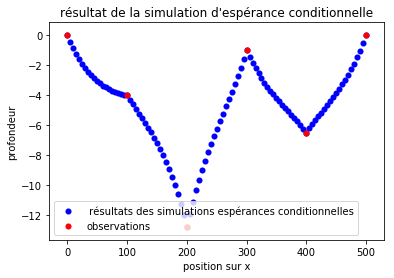

In [28]:
# Question 5 # ----------------------
#La variable alétoire conditionnelle est une gaussienne d'espérence conditonnelle notée mZ calculée avec la formule du cours.

mZ= np.full(N-l,mu) #vecteur de taille N-l, avec la valeur mu commune aux différents points
mY= np.full(l,mu)
y= np.asarray(depth) #résultats des observations
M_cov_obs_inv=np.linalg.inv(M_cov_obs) #on doit inverser la matrice de covariance des observations

E_cond = mZ + np.dot(np.dot(M_cov_unknown_obs,M_cov_obs_inv),y-mY) #formule du cours

#Ensuite on va construire une fonction qui nous permetra d'avoir un vecteur de N coordonnées contenant les resultats, 
# cad les espérances calculées, complétées par celles observées.

def Profondeur(liste):
    R=[]
    for j in liste:
        R.append(j)
    for i in range(len(observation_indexes)):
        R.insert(observation_indexes[i],depth[i])
    return R

# Avec cette fonction on peut faire une représentation :

###réalisation du tracé:
plt.title("résultat de la simulation d'espérance conditionnelle")
plt.xlabel("position sur x")
plt.ylabel("profondeur")
plt.scatter(discretization,Profondeur(E_cond),color='b',linewidth="0.07",
            label=' résultats des simulations espérances conditionnelles')
plt.scatter(np.asarray(observation_indexes)*5,depth,color='r',linewidth="0.07",label='observations')
plt.legend()
plt.show()


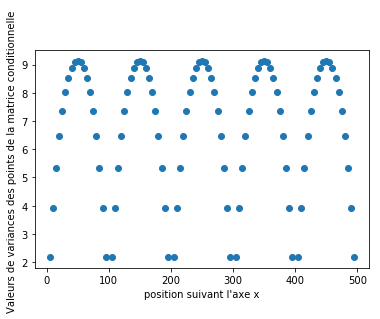

In [29]:
# Question 6 # -------------------------
#on calcule la matrice de covariance conditionnelle avec la formile du cours proba 4

M_cov_cond = M_cov_unknown-np.dot(np.dot(M_cov_unknown_obs,M_cov_obs_inv),np.transpose(M_cov_unknown_obs))
V=[]
for i in range(N-l):
    V.append(M_cov_cond[i][i])
plt.scatter(np.asarray(unknown_indexes)*5,V)
plt.xlabel("position suivant l'axe x")
plt.ylabel("Valeurs de variances des points de la matrice conditionnelle ") #variance car on prend les covariance de la diagonale
plt.show()


#On remarque que la variance est maximale loin des points "observés", et vaut 0 pour les points observés, ce qui semble cohérents
# car ceux si sont déterminés par des Variables Aleatoires constances (i.e, ils sont fixés).


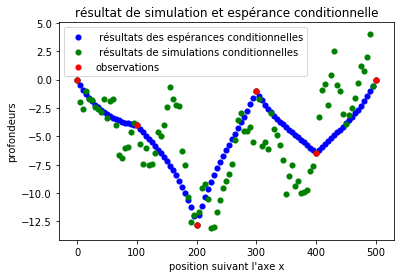

In [30]:
# Question 7 # ----------------------
# On va maintenant réaliser le procédé expliqué dans la question 4 de la partie théorique

#les flottants étant mals représentés, on va d'abord arrondir.
R=np.around(M_cov_cond,6)

C=np.linalg.cholesky(R) #on applique la décompostion de cholesky à cette matrice arrondie

X=[]
Z=[]
for u in range(N-l):
    X.append(np.sqrt(-2*np.log(rd.random()))*np.cos(2*np.pi*rd.random()))# on a là loi normale centrée réduite
Z = E_cond + np.dot(C,X) #Z est le résultat d'une simulation conditionnelle selon les explications de la partie théorique

#On fait le tracé demandé:
plt.xlabel("position suivant l'axe x")
plt.ylabel("profondeurs")
plt.title("résultat de simulation et espérance conditionnelle")
plt.scatter(discretization,Profondeur(E_cond),color='b',linewidth="0.1",
            label=' résultats des espérances conditionnelles')

plt.scatter(discretization,Profondeur(Z),color='g',linewidth="0.1",
            label=' résultats de simulations conditionnelles')
plt.scatter(np.asarray(observation_indexes)*5,depth,color='r',linewidth="0.1",label='observations')
plt.legend()
plt.show()


In [31]:
# Question 8 # ----------------------------
#Il suffit d'appliquer une formule de calcul de longueurs dans l'espace, et on obtient la fonction : 


def L_cable(prof, pas):
    Long=0
    for i in range(len(prof)-1):
        Long+= np.sqrt(pas**2 + (prof[i+1]-prof[i])**2)
    return Long

In [32]:
# Question 9 # -------------------

#On crée une fonction qui réalise p simulations : 

def simulation(n):
    Res=[]
    for j in range(n):
        X=[]
        Z=[]
        for u in range(N-l):
            X.append(np.sqrt(-2*np.log(rd.random()))*np.cos(2*np.pi*rd.random())) #on calcule la loi normale qui varie a chaque simulation
        Z=E_cond+np.dot(C,X) #et on a donc la loi centrée réduite à chaque essai
        Res.append(Z)
    return Res

#On réalise 100 simulations et on calcule la longueur moyenne de cable sur celles ci:
S100=simulation(100)
Avrg_len=0
for i in S100:
    Avrg_len+=L_cable(Profondeur(i),5)#on complete avec toutes les profondeurs et on calcule la longueur
Avrg_len=Avrg_len/100


print(f'La moyenne des longueurs pour 100 simulations vaut {Avrg_len}')
print(f"La longueur de l'espérance conditionnelle vaut {L_cable(Profondeur(E_cond),5)}")


La moyenne des longueurs pour 100 simulations vaut 522.0074789068607
La longueur de l'espérance conditionnelle vaut 501.6468416918411


On obtient 522.219 pour la moyenne de longueur sur 100 simulations et 501.647 pour la longueur de l'esperance conditionnelle.
On attribue ces différences au fait que la longueur n'est pas linéaire de la profondeur. Donc si les profondeurs simulées tendent bien en moyenne vers celles de l'espérance, ce n'est pas forcément le cas pour les longueurs.

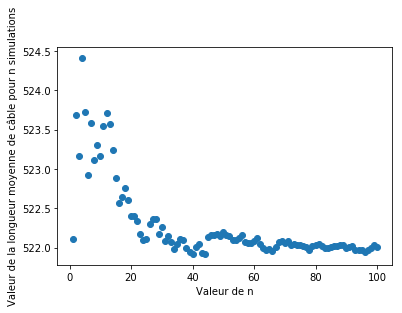

In [33]:
# Question 10 # ----------------
#On va réprésenter la suite Mn des moyennnes des longueurs de câbles en fonction du nombre de simulation n:
Tot_len=0
Avg_len=0
Mn=[]
N_val=[]

for k in range(len(S100)):
    N_val.append(k+1)
    Tot_len+=L_cable(Profondeur(S100[k]),5)#on complete avec toutes les profondeurs et on calcule la longueur
    Avg_len=Tot_len/(k+1)
    Mn.append(Avg_len)
    

plt.scatter(N_val,Mn)
plt.xlabel("Valeur de n")
plt.ylabel('Valeur de la longueur moyenne de câble pour n simulations')
plt.show()

#On peut conjecturer a première vue une convergence vers 522.5 environ pour la longeur de cable

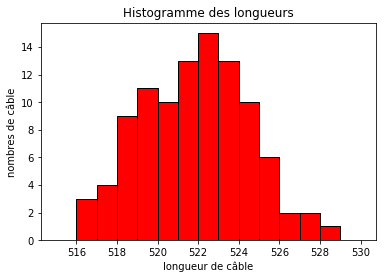

In [34]:
# Question 11 # ----------------


#Pour 100 simulations : 
Tot = []
for i in S100:
    Tot.append(L_cable(Profondeur(i),5))
        
plt.hist(Tot, range = (515, 530), bins = 15, color = 'red', #On choisit les bornes avec la question précédente#
            edgecolor = 'black')
plt.xlabel('longueur de câble')
plt.ylabel('nombres de câble')
plt.title('Histogramme des longueurs')
plt.show()


In [35]:
# Question 12 # -----------------------
#Pour 100 simulations : 

moy,ect = 0,0
for i in Mn : 
    moy+=i
moy = moy/100

for i in Mn :
    ect += (i-moy)**2
    
ect = np.sqrt(ect/100)

print(Mn)
print(ect)

border = 0.95*1/2*ect/(np.sqrt(100))

print(f"l'intervalle de confiance a 95% vaut alors: [{moy-border} ; {moy+border}]") 

[522.1062890020443, 523.6896756415106, 523.1595232890467, 524.4070228005096, 523.7243080720253, 522.9201335631375, 523.5844376586138, 523.1149684987064, 523.302763308453, 523.1603329818254, 523.5429311600684, 523.712705609334, 523.5718332566247, 523.2406977869487, 522.8870108469714, 522.563540977501, 522.6378988368044, 522.7531940001012, 522.6022180765978, 522.4055811243431, 522.4077694317026, 522.3367514379238, 522.1748401747319, 522.0930085442427, 522.112927706057, 522.2966406071445, 522.3582786701419, 522.3604322710197, 522.1676272788341, 522.257956250131, 522.0850737865059, 522.144943049924, 522.075366211807, 521.985828428014, 522.0435138442314, 522.1130969762036, 522.0940374599936, 521.9964997606992, 521.9371256759088, 521.921382797731, 522.0067434993836, 522.0486601281182, 521.9310336152655, 521.9187372501324, 522.1397988596424, 522.164926340815, 522.1602694574077, 522.172051792821, 522.1466064044215, 522.1997396650448, 522.1594291331767, 522.1450649768448, 522.0936691669718, 522

In [ ]:
# Question 13 # ----------------
#pour estimer la probabilité que la longueur du câble dépasse 525m, dans le cas présent (100 simulation,
#ce qui est en réalité assez peu pour estimer une probabilité), on réalise ces suimulation et on approxime
#la probabilité par le calcul [nbre de cas de dépassement/nombre de simulations]


S100=simulation(100)
Nbre_cas=0
for i in S100 :
    if L_cable(Profondeur(i),5)>525:
        Nbre_cas+=1
    
print(f'En se reposant sur 100 simulations, la probabilité que la longueur de câble dépasse 525 vaut approximativement {Nbre_cas_fav/100:.3f}, \ Avec un arrondi au millième')
        